### Partial Differential Equations 3: Exercise sheet 8

The practice questions are similar to the exercises in the textbook and in Schaum's outlines Partial Differential Equations. If you are having difficulties with these questions practice using the remaining questions from these exercise. You will get the best from this tutorial by working though these examples __before__ the tutorial and asking your tutors to help you with questions with which you are having problems.
\
\
\
__Q1__

a) Use the d'Alembert method to solve the wave equation, 

\begin{align}
\frac{1}{c^2}\frac{\partial^2 u(x,t)}{\partial t^2} = \frac{\partial^2 u(x,t)}{\partial x^2} && (1)
\end{align}

subject to the initial conditions

\begin{align}
u(x,0) &= \cos(x), \quad \forall x & (2) \\
\frac{\partial u(x,0)}{\partial t} &= x \exp(-x^2), \quad \forall x. & (3)
\end{align}

__Solution__

The d'Alembert solution (equation 9.19) is given by 

$$
u(x,t) = \frac12\left[F(x+ct)+F(x-ct)\right] +\frac{1}{2c}\int_{x-ct}^{x+ct} G(z)\ \text{d}z
$$

where 

\begin{align}
F(x) = u(x,0) &&\text{and}&& G(x)=\frac{\partial u(x,0)}{\partial t}
\end{align}

We can directly insert $F(x)=\cos(x)$ into the solution but need to calculate the integral of $G(x)$. For 

$$
G(x) = x\exp(-x^2)
$$

we get 

\begin{align}
\frac{1}{2c}\int_{x-ct}^{x+ct} G(z)\ \text{d}z &= \frac{1}{2c}\int_{x-ct}^{x+ct} z\exp(-z^2)\ \text{d}z = \frac{1}{2c}\left[\frac{-1}{2} \exp(-z^2)\right]_{x-ct}^{x+ct} \\
 &= \frac{1}{4c} (\exp(-(x-ct)^2) - \exp(-(x+ct)^2)
\end{align}

In the integral we used the variable $z$ to distinguish the independent variable of the function $G$ from the limits of the integration.

After solving the integral we get the following solution

\begin{align}
u(x,t) &= \frac12\left[\cos(x+ct)+\cos(x-ct)\right]+\frac{1}{4c} (\exp(-(x-ct)^2) - \exp(-(x+ct)^2)
\end{align}

b) Use Python to plot the solution

The solution is similar to that in Exercise sheet 7, but with a different function definition and a different solution domain.


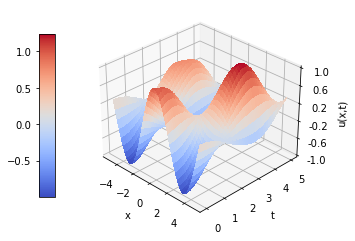

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator , FormatStrFormatter
import numpy as np
# Solution to the wave equation
# Set the x and t grid points and the meshgrid
N = 500
x = np.linspace(-5,5,N)
t = np.linspace(0,5,N)
X,T = np.meshgrid(x,t)
c = 1
# Define the function and generate the output on the meshgrid
W1 = X+c*T
W2 = X-c*T
Z = 0.5*(np.cos(W1) + np.cos(W2)) + (np.exp(-(W2*W2)) - np.exp(-(W1*W1)))/4/c
# Generate the plot
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the surface
surf = ax.plot_surface(X,T,Z,cmap=cm.coolwarm,linewidth=0,antialiased=False)
# Customize the z axis
ax.set_zlim(-1,1)
ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(30,-45)
# Add a color bar which maps values to colors
fig.colorbar(surf,shrink=0.75,aspect=10,location='left')
plt.show()

__Q2__

The spherically symmetric form of the wave equation is 

$$
\frac{1}{c^2}\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial r^2}+\frac{2}{r}\frac{\partial u}{\partial r}
$$

show by writing $v=ru$ that this has solutions of the form

$$
ru(r,t) = f(ct-r) + g(ct+r)
$$

and give a physical interpretation of these solutions.

__Solution__

Consider 

$$
u(r,t) = \frac{1}{r}(f(ct-r) + g(ct+r))
$$

We must differentiate this with respect to the inward travelling and outward travelling waves. Let $f^\prime$ be the derivative with respect to $ct-r$ and $\dot{g}$ be the derivative with respect to $ct+r$. We have

$$
\frac{1}{c^2}u_{tt} = \frac{1}{r}\left[f^{\prime\prime}(ct-r)+\ddot{g}(ct+r)\right]
$$

and

\begin{align}
u_r &= -\frac{1}{r^2}\left[f(ct-r)+g(ct+r)\right]+\frac{1}{r}\left[-f^\prime(ct-r)+\dot{g}(ct+r)\right] \\
u_{rr} &= \frac{2}{r^3}\left[f(ct-r)+g(ct+r)\right]-\frac{2}{r^2}\left[-f^\prime(ct-r)+\dot{g}(ct+r)\right] \\
&+ \frac{1}{r}\left[f^{\prime\prime}(ct-r)+\ddot{g}(ct+r)\right]
\end{align}

Collecting terms

\begin{align}
\frac{1}{c^2}u_{tt}-u_{rr}-\frac{2}{r}u_r &= 
\frac{1}{r^3}\left[r^2(f^{\prime\prime}+\ddot{g})-2(f+g)+2r(f^\prime-\dot{g})\right. \\
& \left.-r^2(f^{\prime\prime}+\ddot{g})+2(f+g)-2r(f^\prime-\dot{g})\right]\\
&= 0
\end{align}

so the solution is satisfied for any functions $f$ and $g$.  The functions represent expanding and converging waves. Note the singular behaviour when $r=0$.